# The 10’000 regressions challenge: apply data mining to identify the relationships

## Import of libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy as sp
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


import xlsxwriter
#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.stattools import grangercausalitytests
#from statsmodels.tsa.tsatools import (lagmat, add_trend)


from statsmodels.compat import lzip


/Users/riad/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Data analysis
### Timeseries

The following timeseries get imported to Python:

    - AUDUSD Curncy

*The timeseries are based on FX Spot rates of the cross currencies (source: Bloomberg).*

***
### Importing the data and ploting those to determine structural jumps, missing data or outliers

### Australia

In [2]:
AUS = pd.read_excel('AUS.xlsx', index_col = 0)
AUS.tail()

,AUDUSD Curncy,AUNAGDPY Index,AUCPIYOY Index,AUPPFYOY Index,OEAUV013 Index,AURSTYSA Index,ECO8AUBS Index,WMCCCONS Index,GACGB10 Index,AUITGSB Index,AULFUNEM Index
DATES,,,,,,,,,,,
2020-11-30,0.7344,-3.7,0.7,-0.4,108.80,13.2,-6.1,107.66,0.896,5849,6.8
2020-12-31,0.7694,-1.1,0.9,-0.1,108.43,9.7,-6.1,112.04,0.970,7577,6.6
2021-01-31,0.7644,-1.1,0.9,-0.1,108.43,10.6,-6.1,106.99,1.133,9616,6.3
2021-02-28,0.7706,-1.1,0.9,-0.1,108.43,9.1,-6.1,109.06,1.917,7529,5.8
2021-03-31,0.7598,-1.1,0.9,-0.1,108.43,9.1,-6.1,111.84,1.786,7529,5.6


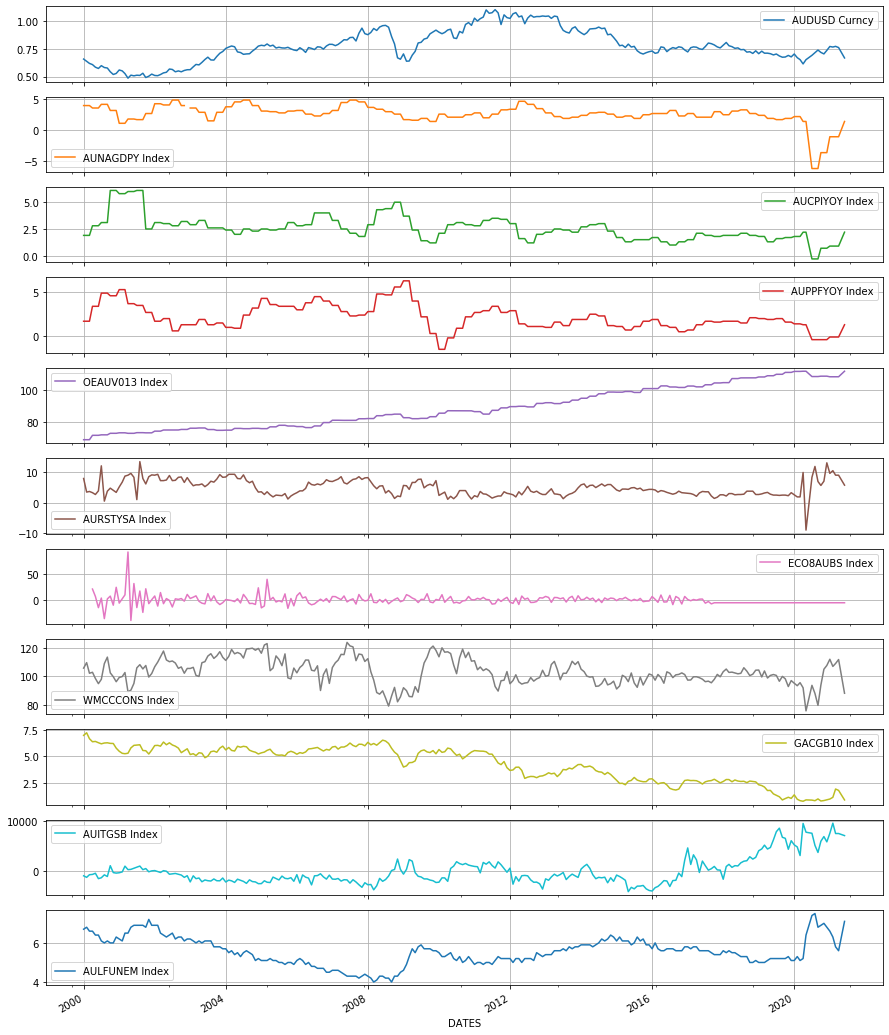

In [3]:
AUS.plot(figsize=(15, 20), grid=True, subplots=True);

#### Replace Missing Values & Zeros if present and unjustified --> will lead to statsitical errors

In [4]:
#Search for missing values and counting them
AUS.isnull().sum()

AUDUSD Curncy     0
AUNAGDPY Index    1
AUCPIYOY Index    0
AUPPFYOY Index    0
OEAUV013 Index    0
AURSTYSA Index    0
ECO8AUBS Index    3
WMCCCONS Index    0
GACGB10 Index     0
AUITGSB Index     0
AULFUNEM Index    0
dtype: int64

#### Cleaning the data by replacing missing values and zeros

In [5]:
AUS["AUNAGDPY Index"][35:36]

DATES
2002-11-30   NaN
Name: AUNAGDPY Index, dtype: float64

In [6]:
AUS["AUNAGDPY Index"][35:36] = AUS["AUNAGDPY Index"][34:35]

/Users/riad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [7]:
AUS["ECO8AUBS Index"][0:3]

DATES
1999-12-31   NaN
2000-01-31   NaN
2000-02-29   NaN
Name: ECO8AUBS Index, dtype: float64

In [8]:
AUS["ECO8AUBS Index"][0:1] = AUS["ECO8AUBS Index"][3:4]
AUS["ECO8AUBS Index"][1:2] = AUS["ECO8AUBS Index"][3:4]
AUS["ECO8AUBS Index"][2:3] = AUS["ECO8AUBS Index"][3:4]

/Users/riad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/riad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/riad/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separat

#### Testing if all missing values are replaced

In [9]:
AUS.isnull().sum()

AUDUSD Curncy     0
AUNAGDPY Index    0
AUCPIYOY Index    0
AUPPFYOY Index    0
OEAUV013 Index    0
AURSTYSA Index    0
ECO8AUBS Index    0
WMCCCONS Index    0
GACGB10 Index     0
AUITGSB Index     0
AULFUNEM Index    0
dtype: int64

In [10]:
#AUS.to_csv("AUS_clean.csv")

In [13]:
AUS.describe()

,AUDUSD Curncy,AUNAGDPY Index,AUCPIYOY Index,AUPPFYOY Index,OEAUV013 Index,AURSTYSA Index,ECO8AUBS Index,WMCCCONS Index,GACGB10 Index,AUITGSB Index,AULFUNEM Index
count,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000
mean,0.775317,2.623047,2.538281,2.162891,88.829805,4.850000,-0.599219,103.265312,4.258488,-94.316406,5.547266
std,0.146793,1.577183,1.161582,1.450703,12.642950,2.661755,10.256285,9.059832,1.678211,2721.432316,0.698396
min,0.485600,-6.300000,-0.300000,-1.500000,69.000000,-9.100000,-40.500000,75.640000,0.762000,-4185.000000,4.000000
25%,0.701175,2.100000,1.800000,1.200000,76.590000,2.800000,-6.100000,97.385000,2.722750,-1868.250000,5.100000
50%,0.760500,2.700000,2.400000,1.900000,86.580000,4.050000,-1.700000,102.375000,5.062500,-962.000000,5.500000
75%,0.885275,3.300000,3.000000,3.000000,101.015000,6.800000,3.000000,110.122500,5.616250,935.750000,6.000000
max,1.099300,4.900000,6.100000,6.300000,111.900000,13.600000,92.400000,123.940000,7.225000,9616.000000,7.500000


In [14]:
currency = pd.DataFrame({'AUDUSD Curncy': AUS.iloc[:,0]}, index = AUS.index)

***
## Stationary tests

In [15]:
Curncy = ['AUDUSD Curncy']


for i in Curncy:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(currency[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(currency[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
AUDUSD Curncy in Level 
 ADF Stat (Library) for AUDUSD Curncy : -0.07 
 ADF P-Val (Library) AUDUSD Curncy : 0.66 

AUDUSD Curncy in 1st Difference 
 ADF Stat (Library) for AUDUSD Curncy : -11.25 
 ADF P-Val (Library) AUDUSD Curncy : 0.00 

Number of lags used: 2
AUDUSD Curncy in Level 
 ADF Stat (Library) for AUDUSD Curncy : -0.02 
 ADF P-Val (Library) AUDUSD Curncy : 0.68 

AUDUSD Curncy in 1st Difference 
 ADF Stat (Library) for AUDUSD Curncy : -8.44 
 ADF P-Val (Library) AUDUSD Curncy : 0.00 

____________________________________________ 



In [16]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in Curncy:
        adf_library = adfuller(currency[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(currency[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Prices (Level)
AUDUSD Curncy : 0.66
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
AUDUSD Curncy : 0.68
____________________________________________ 



In [17]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in Curncy:
        adf_library = adfuller(currency[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(currency[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Absolute Returns (1st Difference)
AUDUSD Curncy : 0.00
____________________________________________ 

Number of lags used: 2
ADF P-Val for Absolute Returns (1st Difference)
AUDUSD Curncy : 0.00
____________________________________________ 



### Australia - Multivariate OLS regressions

In [18]:
# OLS Regression for AUD/USD Currency; compared with 10 macrovariables
# AUNAGDPY Index = Gross Domestic Product
# AUCPIYOY Index = Consumer Prices
# AUPPFYOY Index = Producer Prices
# OEAUV013 Index = Industrial Production
# AURSTYSA Index = Retail Sales
# ECO8AUBS Index = New privat home sales
# WMCCCONS Index = Consumer confidence
# GACGB10 Index = 10Y Government Yields
# AUITGSB Index = Trade balance
# AULFUNEM Index = Unemployment rate

yAUS = AUS["AUDUSD Curncy"]
xAUS = AUS[["AUNAGDPY Index", "AUCPIYOY Index", "AUPPFYOY Index", "OEAUV013 Index", 
         "AURSTYSA Index", "ECO8AUBS Index", "WMCCCONS Index", "GACGB10 Index", 
         "AUITGSB Index", "AULFUNEM Index"]]
xAUS = sm.add_constant(xAUS)

modelAUS = sm.OLS(yAUS, xAUS, missing = "drop")
resultsAUS = modelAUS.fit()
print(resultsAUS.summary())

                            OLS Regression Results                            
Dep. Variable:          AUDUSD Curncy   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     23.76
Date:                Sun, 30 May 2021   Prob (F-statistic):           5.27e-31
Time:                        23:17:02   Log-Likelihood:                 215.23
No. Observations:                 256   AIC:                            -408.5
Df Residuals:                     245   BIC:                            -369.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.2981      0.297      4.

In [19]:
YAUS = AUS['AUDUSD Curncy']

In [20]:
regressionAUS = pd.DataFrame(YAUS)

predictionAUS = resultsAUS.predict()

regressionAUS['Prediction']=predictionAUS
regressionAUS.head()

,AUDUSD Curncy,Prediction
DATES,,
1999-12-31,0.6567,0.613545
2000-01-31,0.6370,0.654096
2000-02-29,0.6178,0.660981
2000-03-31,0.6071,0.612309
2000-04-30,0.5839,0.639748


<function matplotlib.pyplot.show(*args, **kw)>

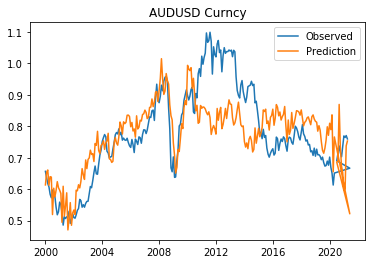

In [21]:
plt.plot(regressionAUS)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('AUDUSD Curncy')
plt.show

### Australia - Heteroskedasticity 

<function matplotlib.pyplot.show(*args, **kw)>

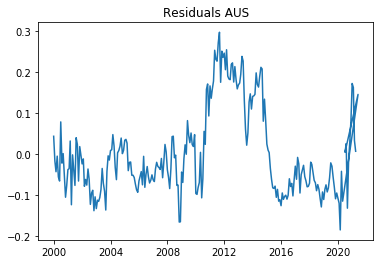

In [22]:
residualsAUS = YAUS - predictionAUS
plt.plot(residualsAUS)
plt.title('Residuals AUS')
plt.show

In [23]:
#Normality of the residuals
residualsAUS = YAUS - predictionAUS
xs_with_constantAUS = sm.add_constant(xAUS)

name_JB_AUS = ['Jarque-Bera', 'JB P-value', 'Skew', 'Kurtosis']
test_JB_AUS = sms.jarque_bera(residualsAUS)
lzip(name_JB_AUS, test_JB_AUS)

[('Jarque-Bera', 38.95808677030896),
 ('JB P-value', 3.47023547467039e-09),
 ('Skew', 0.955359560895114),
 ('Kurtosis', 2.9616193754396107)]

In [24]:
# Omni-Test
name_Omni_AUS = ['Chi^2', 'Two-tail probability']
test_Omni_AUS = sms.omni_normtest(resultsAUS.resid)
lzip(name_Omni_AUS, test_Omni_AUS)

[('Chi^2', 30.429435664363663),
 ('Two-tail probability', 2.4679252521578604e-07)]

In [25]:
# Breush Pagan Test for Heteroskedastic residuals
name_BP_AUS = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']

test_BP_AUS = sms.het_breuschpagan(residualsAUS, resultsAUS.model.exog)
lzip(name_BP_AUS, test_BP_AUS)

[('Lagrange multiplier statistic', 41.15973371152492),
 ('p-value', 1.0572553895067068e-05),
 ('f-value', 4.6937824708256555),
 ('f p-value', 3.831781087024035e-06)]

In [26]:
# Goldfeld-Quandt test
name_GQ_AUS = ['F statistic', 'p-value']
test_GQ_AUS = sms.het_goldfeldquandt(resultsAUS.resid, resultsAUS.model.exog)
lzip(name_GQ_AUS, test_GQ_AUS)

[('F statistic', 1.7652801490019057), ('p-value', 0.0011563974153228217)]

### Australia - Autocorrelation 

In [27]:
# JB Test for Normal Distribution of Residuals
dw_pvalueAUS=sm.stats.stattools.durbin_watson(residualsAUS)
print("\n","Durbin Watson Test Statistics", dw_pvalueAUS)


 Durbin Watson Test Statistics 0.24045641755647287


### Australia - Multicollinearity

In [28]:
corrAUS = AUS.corr()
corrAUS.head()

,AUDUSD Curncy,AUNAGDPY Index,AUCPIYOY Index,AUPPFYOY Index,OEAUV013 Index,AURSTYSA Index,ECO8AUBS Index,WMCCCONS Index,GACGB10 Index,AUITGSB Index,AULFUNEM Index
AUDUSD Curncy,1.000000,0.056417,-0.204519,-0.131591,0.215862,-0.329245,-0.055537,-0.003492,-0.079401,-0.177677,-0.505482
AUNAGDPY Index,0.056417,1.000000,0.256277,0.255035,-0.448391,-0.103273,0.093604,0.280337,0.515488,-0.564845,-0.369439
AUCPIYOY Index,-0.204519,0.256277,1.000000,0.707217,-0.593761,0.069024,0.145023,-0.106133,0.605646,-0.178266,-0.094569
AUPPFYOY Index,-0.131591,0.255035,0.707217,1.000000,-0.474618,-0.033062,0.078258,-0.211773,0.474738,-0.185076,-0.358887
OEAUV013 Index,0.215862,-0.448391,-0.593761,-0.474618,1.000000,-0.333113,-0.228066,-0.386965,-0.934511,0.555905,0.010670


In [29]:
#corrAUS.to_csv('AUS_Multicollinearity.csv')

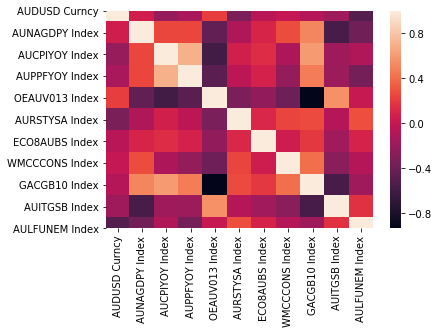

In [30]:
sns.heatmap(corrAUS, 
            xticklabels=corrAUS.columns.values,
            yticklabels=corrAUS.columns.values)

In [31]:
#Code for VIF Calculation 
#Source: https://statinfer.com/204-1-9-issue-of-multicollinearity-in-python/
# Adjusted for Endogenity
#Writing a function to calculate the VIF values

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [32]:
#Calculating VIF values using that function
VIF_AUS = vif_cal(input_data=AUS, dependent_col='AUDUSD Curncy')
VIF_AUS

AUNAGDPY Index  VIF =  7.1
AUCPIYOY Index  VIF =  17.35
AUPPFYOY Index  VIF =  7.57
OEAUV013 Index  VIF =  107.31
AURSTYSA Index  VIF =  5.91
ECO8AUBS Index  VIF =  1.07
WMCCCONS Index  VIF =  188.16
GACGB10 Index  VIF =  49.48
AUITGSB Index  VIF =  1.9
AULFUNEM Index  VIF =  70.4
